In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('latest_bollywood_songs_2024.csv')

In [3]:
data.head(15)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5hR6lVUp1JyTrxzihXTvZJ,"Pritam, Papon, Varun Grover","Nazar Teri Toofan (From ""Merry Christmas"")","Nazar Teri Toofan (From ""Merry Christmas"")",62,243610,False,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.2520,117.202,4
1,2kPXVr1Sr8hoCv7g41WCuS,"Pritam, Diljit Dosanjh, Kumaar","Banda (From ""Dunki"")","Banda (From ""Dunki"")",58,168861,False,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.6090,127.087,4
2,5qMvYzgquX6SnugWREFj6e,"Pritam, Ash King, Varun Grover","Merry Christmas (Title Track) (From ""Merry Chr...","Merry Christmas (Title Track) (From ""Merry Chr...",51,152000,False,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.8210,105.063,4
3,0VXBujZKMLLlmee25BXEQs,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Sher Khul Gaye (From ""Fighter"")","Sher Khul Gaye (From ""Fighter"")",74,180172,False,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.8100,123.021,4
4,1XMQPTzIjDiPUK0siiavXi,Shane Stephen,Meri Ye Raahein,Meri Ye Raahein,10,273488,False,0.390,0.262,5,-13.751,1,0.0379,0.6910,0.000005,0.1310,0.4790,82.168,4
5,79hfXFxxw7rQVp0HVvhutu,"Shide Boss, Mazza On The Track",Swing My Way (Sohniye),Swing My Way (Sohniye),39,128813,False,0.760,0.477,5,-9.666,0,0.1030,0.3480,0.000000,0.1490,0.5670,96.988,4
6,5gr25T51b11HpK72jGjmcC,Prismin,Barsaat,Barsaat,40,192014,False,0.619,0.372,5,-13.115,1,0.0307,0.2270,0.000000,0.1690,0.3690,100.070,4
7,1SIttgyGv61OU31Z0H3g6z,Shazvit,Raaste,Raaste,26,138352,False,0.627,0.555,0,-7.880,1,0.0533,0.7750,0.000002,0.1020,0.7270,170.199,4
8,5gdO3fgWvjACjpt8nB0uqi,"Shreya Sharma, Mazza On The Track, Shreya Jain",Soyi Khoyi (Remix),Soyi Khoyi - Remix,18,126101,False,0.842,0.451,1,-10.434,0,0.0727,0.3920,0.000007,0.5640,0.5580,117.991,4
9,1k3i030OvSLAjHf4wv4pf2,Siddhant Goenka,Farishtey,Farishtey,41,201882,False,0.336,0.486,7,-10.336,1,0.0408,0.0809,0.000022,0.5660,0.1020,169.862,4


In [4]:
data.shape


(230, 19)

In [5]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [6]:
bin_edges = [0, 36, 55, 100]  
bin_labels = ['Low', 'Medium', 'High']

# Categorize the "popularity" column
data['popularity_category'] = pd.cut(data['popularity'], bins=bin_edges, labels=bin_labels, include_lowest=True)


In [7]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_category
0,5hR6lVUp1JyTrxzihXTvZJ,"Pritam, Papon, Varun Grover","Nazar Teri Toofan (From ""Merry Christmas"")","Nazar Teri Toofan (From ""Merry Christmas"")",62,243610,False,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.252,117.202,4,High
1,2kPXVr1Sr8hoCv7g41WCuS,"Pritam, Diljit Dosanjh, Kumaar","Banda (From ""Dunki"")","Banda (From ""Dunki"")",58,168861,False,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.609,127.087,4,High
2,5qMvYzgquX6SnugWREFj6e,"Pritam, Ash King, Varun Grover","Merry Christmas (Title Track) (From ""Merry Chr...","Merry Christmas (Title Track) (From ""Merry Chr...",51,152000,False,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.821,105.063,4,Medium
3,0VXBujZKMLLlmee25BXEQs,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Sher Khul Gaye (From ""Fighter"")","Sher Khul Gaye (From ""Fighter"")",74,180172,False,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.810,123.021,4,High
4,1XMQPTzIjDiPUK0siiavXi,Shane Stephen,Meri Ye Raahein,Meri Ye Raahein,10,273488,False,0.390,0.262,5,-13.751,1,0.0379,0.6910,0.000005,0.1310,0.479,82.168,4,Low


In [8]:
data['popularity_category'].value_counts()

Low       96
Medium    74
High      60
Name: popularity_category, dtype: int64

In [9]:
# Split data into features and target variable
X = data.drop(['track_id', 'artists', 'album_name', 'track_name', 'popularity','popularity_category'], axis=1)
y = data['popularity_category']




In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [17]:
X_train

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
140,128000,False,0.619,0.426,5,-11.235,1,0.0312,0.777,0.000006,0.1110,0.429,103.094,4
78,212773,False,0.699,0.299,6,-12.599,1,0.0403,0.869,0.000000,0.0724,0.459,118.969,4
135,161041,False,0.739,0.716,10,-4.964,1,0.0370,0.232,0.000000,0.3300,0.871,113.943,4
26,203806,False,0.362,0.451,5,-8.408,1,0.0371,0.702,0.000000,0.1220,0.398,80.232,4
211,215127,False,0.883,0.740,2,-3.416,1,0.0403,0.136,0.000011,0.0386,0.789,113.981,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,221132,False,0.785,0.589,0,-8.833,0,0.0399,0.677,0.005170,0.2430,0.757,104.986,4
14,169686,False,0.736,0.697,1,-7.672,0,0.0416,0.115,0.000015,0.1490,0.386,104.974,4
92,147613,False,0.612,0.618,4,-6.903,0,0.3360,0.123,0.000002,0.2700,0.777,175.836,4
179,162285,False,0.766,0.416,2,-10.350,0,0.0379,0.446,0.000006,0.1090,0.648,105.085,4


In [18]:
y_train

140       Low
78        Low
135      High
26     Medium
211    Medium
        ...  
106    Medium
14       High
92        Low
179      High
102    Medium
Name: popularity_category, Length: 138, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [15]:
# SVM Modeling with different kernels and costs
kernels = ['linear', 'rbf', 'poly']
costs = [0.1, 1.0, 10]

Kernel: linear | Cost: 0.1
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        29
         Low       0.38      1.00      0.55        34
      Medium       0.33      0.03      0.06        29

    accuracy                           0.38        92
   macro avg       0.24      0.34      0.21        92
weighted avg       0.25      0.38      0.22        92



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

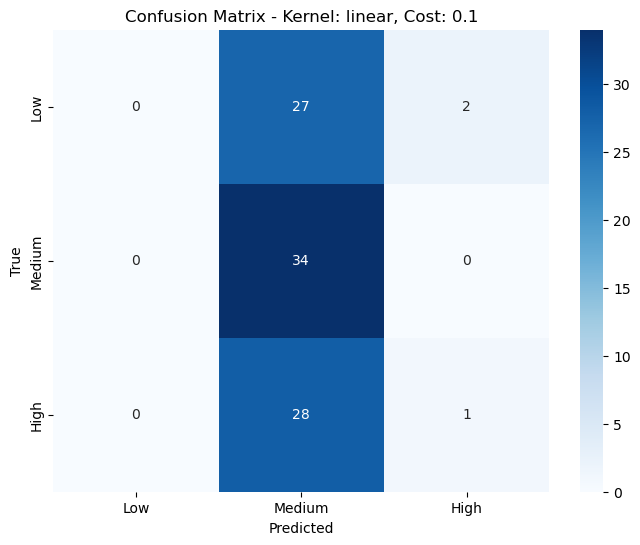

Kernel: linear | Cost: 1.0
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        29
         Low       0.38      0.91      0.53        34
      Medium       0.50      0.17      0.26        29

    accuracy                           0.39        92
   macro avg       0.29      0.36      0.26        92
weighted avg       0.30      0.39      0.28        92



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

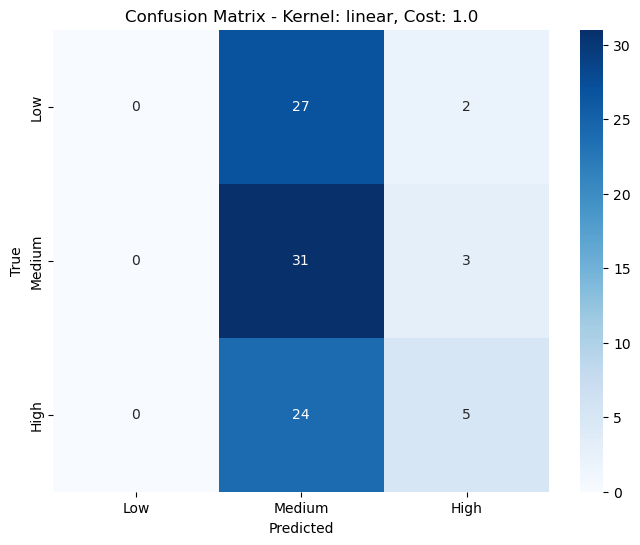

Kernel: linear | Cost: 10
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        29
         Low       0.38      0.91      0.53        34
      Medium       0.50      0.17      0.26        29

    accuracy                           0.39        92
   macro avg       0.29      0.36      0.26        92
weighted avg       0.30      0.39      0.28        92



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

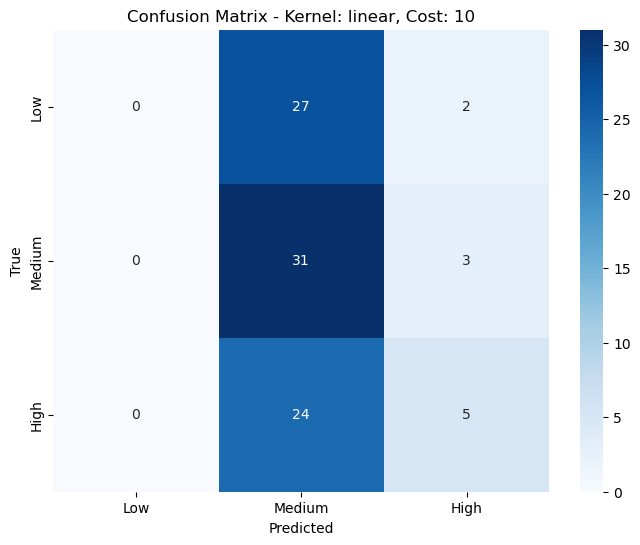

Kernel: rbf | Cost: 0.1
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        29
         Low       0.37      1.00      0.54        34
      Medium       0.00      0.00      0.00        29

    accuracy                           0.37        92
   macro avg       0.12      0.33      0.18        92
weighted avg       0.14      0.37      0.20        92



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

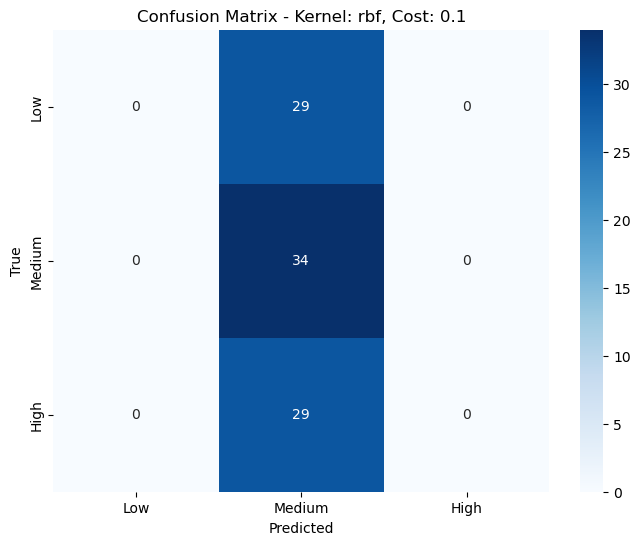

Kernel: rbf | Cost: 1.0
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        29
         Low       0.37      1.00      0.54        34
      Medium       0.00      0.00      0.00        29

    accuracy                           0.37        92
   macro avg       0.12      0.33      0.18        92
weighted avg       0.14      0.37      0.20        92



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

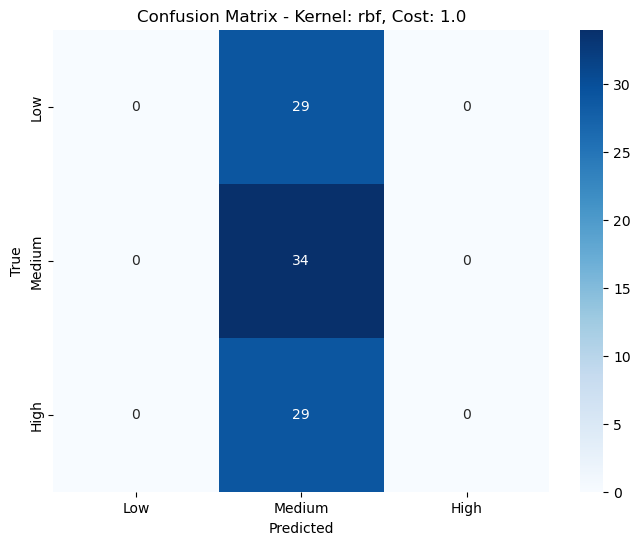

Kernel: rbf | Cost: 10
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        29
         Low       0.37      1.00      0.54        34
      Medium       0.00      0.00      0.00        29

    accuracy                           0.37        92
   macro avg       0.12      0.33      0.18        92
weighted avg       0.14      0.37      0.20        92



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

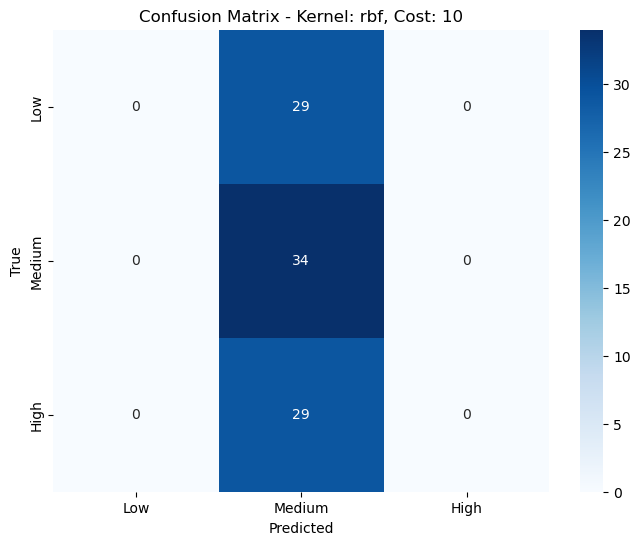

Kernel: poly | Cost: 0.1
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        29
         Low       0.37      1.00      0.54        34
      Medium       0.00      0.00      0.00        29

    accuracy                           0.37        92
   macro avg       0.12      0.33      0.18        92
weighted avg       0.14      0.37      0.20        92



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

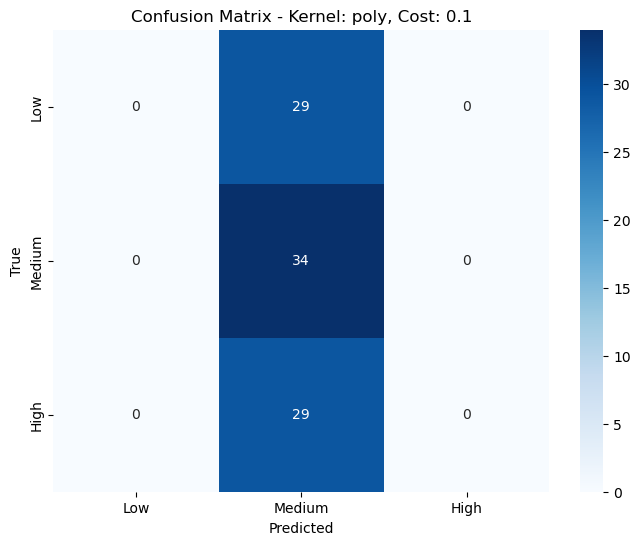

Kernel: poly | Cost: 1.0
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        29
         Low       0.37      1.00      0.54        34
      Medium       0.00      0.00      0.00        29

    accuracy                           0.37        92
   macro avg       0.12      0.33      0.18        92
weighted avg       0.14      0.37      0.20        92



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

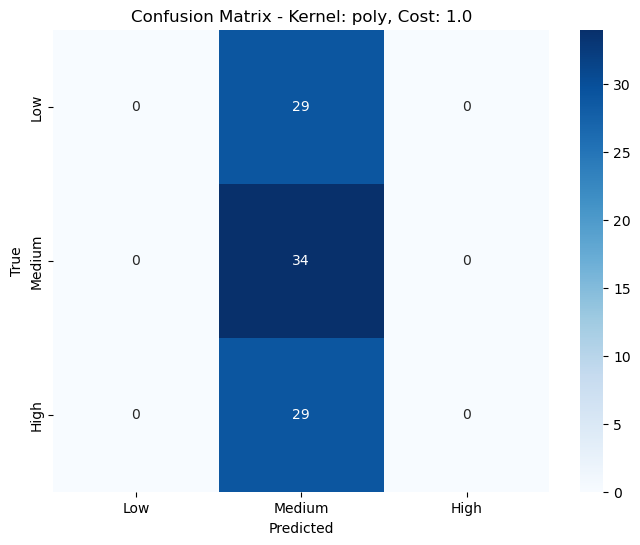

Kernel: poly | Cost: 10
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        29
         Low       0.37      1.00      0.54        34
      Medium       0.00      0.00      0.00        29

    accuracy                           0.37        92
   macro avg       0.12      0.33      0.18        92
weighted avg       0.14      0.37      0.20        92



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

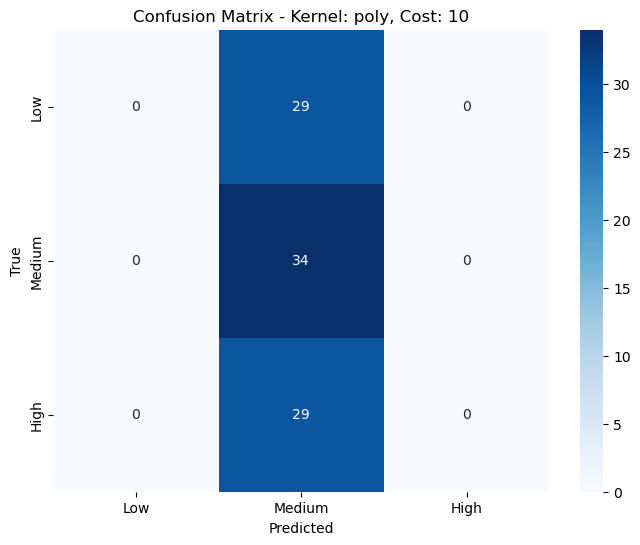

In [16]:
for kernel in kernels:
    for cost in costs:
        # Train the SVM Model
        svm_model = SVC(kernel=kernel, C=cost)
        svm_model.fit(X_train, y_train)

        # Predictions
        y_pred = svm_model.predict(X_test)

        # Classification Report
        print("Kernel:", kernel, "| Cost:", cost)
        print(classification_report(y_test, y_pred))
        
        labels = ['Low', 'Medium', 'High']

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
        plt.title("Confusion Matrix - Kernel: {}, Cost: {}".format(kernel, cost))
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()